# EDA and Cleanup

### Data dictionary describing each feature before we dive into inspection


| Feature                         | Python Type | Data Type  | DROP? | Descritpion   |
| ---                             | ---         | ---        | ---   |:---           |
| all_awardings                   | Object      | Continuous |   X   | All awards the post received (tags, images, etc.) |
| associated_award                | float64     | Continuous |   X   | Not sure - all were populated with '[]' |
| author                          | Object      | Continuous |   X   | Reddit-Handle of the auther of the comment |
| author_flair_background_color   | float64     | Continuous |   X   | Flair background color - all were populated with '[]' |
| author_flair_css_class          | float64     | Continuous |   X   | Flair CSS class - all were populated with '[]' |
| author_flair_richtext           | Object      | Continuous |   X   | Flair richtext - all were populated with '[]' |
| author_flair_template_id        | float64     | Continuous |   X   | Flair template ID - all were populated with '[]' |
| author_flair_text               | float64     | Nominal    |   X   | Flair text - all were populated with '[]' |
| author_flair_text_color         | Object      | Nominal    |   X   | Flair text color - almost all were populated with '[]' |
| author_flair_type               | Object      | Nominal    |   X   | Flair type - almost all are 'text' |
| author_fullname                 | Object      | Continuous |   X   | Full author-id of the author of the comment |
| author_patreon_flair            | Boolean     | Ordinal    |   X   | Whether author's has Patreon Flair almost all were 'False' |
| author_premium                  | Boolean     | Continuous |       | Denotes whether author is a premium user |
| awarders                        | Object      | Continuous |   X   | Not sure - all were populated with '[]' |
| __body__                        | Object      | Continuous |       | Text part we will be evaluating (X-value) |
| collapsed_because_crowd_control | int64       | Continuous |   X   | Not sure - all were populated with '[]' |
| comment_type                    | int64       | Continuous |   X   | Not sure - all were populated with 'NaN' |
| created_utc                     | Object      | Continuous |   X   | When the comment was created |
| gildings                        | Object      | Continuous |   X   | Gildings teh author of the post has/recieved |
| id                              | Object      | Continuous |   X   | Comment ID (in relation to other comments) |
| is_submitter                    | Boolean     | Continuous |       | Seems to denote whether the commenter authored the parent post  |
| link_id                         | Object      | Continuous |   X   | ID which part of is used in the permalink |
| locked                          | Boolean     | Continuous |   X   | Denotes whether the thread (which the comment is part of) has been locked |
| no_follow                       | Boolean     | Continuous |       | Seems to denote whether the author of the post can be followed on reddit |
| parent_id                       | Object      | Continuous |   X   | ID of the parent comment (in relation to the current comment) Dropping because it may make guessing too easy. |
| permalink                       | Object      | Continuous |   X   | URL to post - must drop because this contains the subreddit name |
| retrieved_on                    | Object      | Continuous |   X   | When comment was retrieved through the pushshift.io API - dropping because it should not be relevant |
| score                           | int64       | Continuous |       | 'Score' (or Karma) of the comment |
| send_replies                    | Boolean     | Continuous |       | Seems to denote whether author of comment accepts replies |
| stickied                        | Boolean     | Continuous |   X   | Denotes 'Sticky posts' - Sticky posts are announcements and are not posts |
| __subreddit__                   | Object      | Continuous |   X   | y-value - the subreddit we want to predict, __must drop__ |
| subreddit_id                    | Object      | Continuous |   X   | ID representation of the subreddit, __must drop__ |
| top_awarded_type                | Object      | Continuous |   X   | Not sure - all were populated with 'NaN' |
| total_awards_received           | int64       | Continuous |       | Number of awards received by the author of the comment |
| treatment_tags                  | Object      | Continuous |   X   | Not sure - all were populated with '[]' |
| distinguished                   | Object      | Continuous |   X   | Denotes whether the author of the post is a 'moderator' |
| author_cakeday                  | Boolean     | Continuous |   X   | Boolean whether it is the 'cakeday' of the author of the comment (cakeday is the anniversary of the day the user originally signed up for reddit.) |


##### \* **About Flair**, per Reddit, "Flair is used as a tagging system for posts as well as individual users, and it can be used to filter content, unique identifiers, and resources." I found that the entries I grabbed had no information in regard to Flair; when the value was not null, it typically had an empty list in it's place. It is unclear if that is because there was no info, or if the API was unable to get this information, but regardless, this is of no use to my model and will be or was dropped.

### Remarks about dropped columns
I dropped __a lot__ of columns, and the reason was to ensure that it was not too easy for the model to predict.

For instance, I dropped almost all 'author' information since it not unusual for people on reddit to visit/comment in the same subreddits frequently (shown later in this document). 

I also removed columns that had any other type of ID, for instance the permalink has the subreddit identified within it.

I also dropped columns that had no information, since many were completely populated wit hempty square brackets, or any information that would likely be irrelevant, like author_cakeday or distinguished.

In [1]:
from ipynb.fs.full.functions import *

In [2]:
df = pd.read_csv('../data/comments.csv')
start_rows = df.shape[0]
df.shape

(10000, 37)

## Inspection

In [3]:
df.head()

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,score,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,distinguished,author_cakeday
0,[],NaN,AgronLovesSteel,NaN,NaN,[],NaN,NaN,NaN,text,...,1,True,False,AMA,t5_2r4eo,NaN,0,[],NaN,NaN
1,[],NaN,Adventurous-Mess9304,NaN,NaN,[],NaN,NaN,NaN,text,...,2,True,False,AMA,t5_2r4eo,NaN,0,[],NaN,NaN
2,[],NaN,ab901,NaN,NaN,[],NaN,NaN,NaN,text,...,1,True,False,AMA,t5_2r4eo,NaN,0,[],NaN,NaN
3,[],NaN,[deleted],NaN,NaN,NaN,NaN,NaN,dark,NaN,...,1,True,False,AMA,t5_2r4eo,NaN,0,[],NaN,NaN
4,[],NaN,pardo92,NaN,NaN,[],NaN,NaN,NaN,text,...,1,True,False,AMA,t5_2r4eo,NaN,0,[],NaN,NaN


In [4]:
df['post_length'] = df['body'].str.len()

In [5]:
df['post_length'].describe()

count    10000.000000
mean       151.824300
std        298.460363
min          1.000000
25%         28.000000
50%         71.000000
75%        164.000000
max       8845.000000
Name: post_length, dtype: float64

In [6]:
df.columns

Index(['all_awardings', 'associated_award', 'author',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders',
       'body', 'collapsed_because_crowd_control', 'comment_type',
       'created_utc', 'gildings', 'id', 'is_submitter', 'link_id', 'locked',
       'no_follow', 'parent_id', 'permalink', 'retrieved_on', 'score',
       'send_replies', 'stickied', 'subreddit', 'subreddit_id',
       'top_awarded_type', 'total_awards_received', 'treatment_tags',
       'distinguished', 'author_cakeday', 'post_length'],
      dtype='object')

### Authors in one subreddit
#### I found some authors "hang-out" around the same subreddit
I get into this more later.

In [7]:
df['author'].value_counts()

[deleted]              237
arrowfuckinghead       171
Blue-Corn              104
AutoModerator           92
YeastyP1ssFlaps         71
                      ... 
thegiraff3boi            1
SurfWyoming              1
dronna                   1
Ok-Cauliflower-7760      1
loopsydoopsy             1
Name: author, Length: 4498, dtype: int64

In [8]:
compare_author_to_subreddit = (df['author'] == 'arrowfuckinghead')
df[compare_author_to_subreddit]['subreddit'].value_counts()

AMA    171
Name: subreddit, dtype: int64

In [9]:
compare_author_to_subreddit = (df['author'] == 'Blue-Corn')
df[compare_author_to_subreddit]['subreddit'].value_counts()

AMA    104
Name: subreddit, dtype: int64

In [10]:
compare_author_to_subreddit = (df['author'] == 'AutoModerator')
df[compare_author_to_subreddit]['subreddit'].value_counts()

AskReddit    85
AMA           7
Name: subreddit, dtype: int64

In [11]:
compare_author_to_subreddit = (df['author'] == 'YeastyP1ssFlaps')
df[compare_author_to_subreddit]['subreddit'].value_counts()

AMA    71
Name: subreddit, dtype: int64

## Looking for NaNs

author_flair_richtext                2.37
author_flair_type                    2.37
author_fullname                      2.37
author_patreon_flair                 2.37
author_premium                       2.37
author_flair_text_color             97.63
distinguished                       99.08
author_cakeday                      99.79
associated_award                   100.00
author_flair_background_color      100.00
author_flair_css_class             100.00
author_flair_template_id           100.00
author_flair_text                  100.00
collapsed_because_crowd_control    100.00
comment_type                       100.00
top_awarded_type                   100.00
dtype: float64

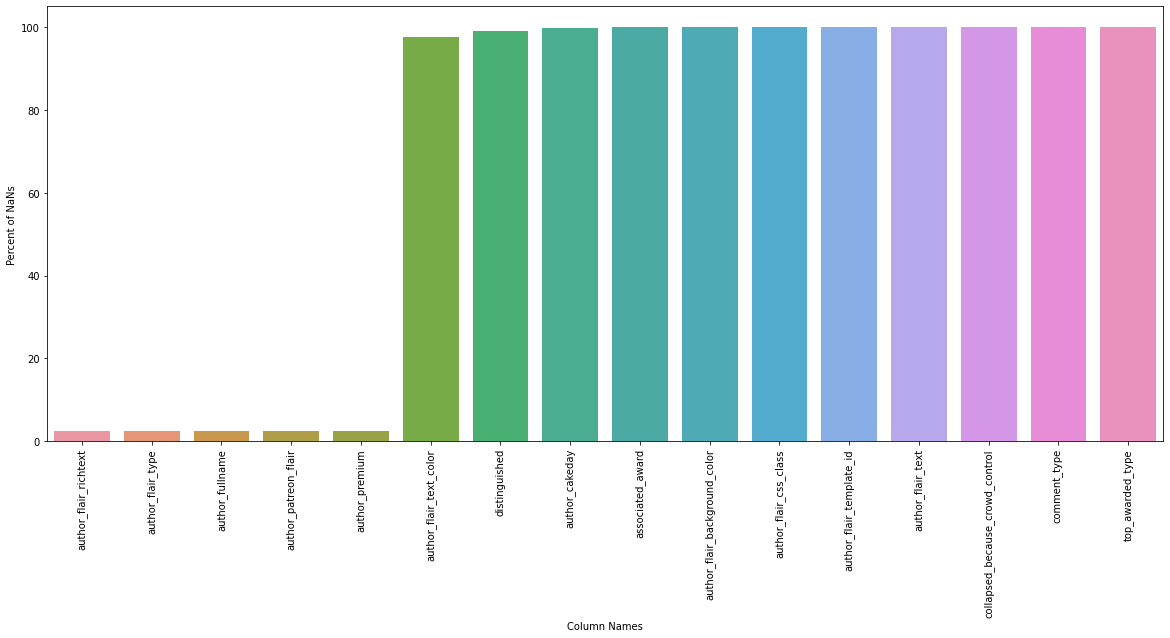

In [12]:
# plot_my_nans(df, save_output='../images/nan_columns_before.png')
plot_my_nans(df)

### That's a lot of NaNs!
But there seem to be more columns without much data, but that are not NaNs

In [13]:
df['author_flair_type'].value_counts()

text    9763
Name: author_flair_type, dtype: int64

In [14]:
df['author_patreon_flair'].value_counts()

False    9763
Name: author_patreon_flair, dtype: int64

In [15]:
# Low variance, and empty sets are not NaNs - changing these sets to NaNs in a step or two
print(df['author_flair_richtext'].value_counts())
print(df['awarders'].value_counts())
print(df['gildings'].value_counts())
print(df['stickied'].value_counts())


[]    9763
Name: author_flair_richtext, dtype: int64
[]    10000
Name: awarders, dtype: int64
{}              9992
{'gid_1': 1}       6
{'gid_1': 3}       1
{'gid_2': 1}       1
Name: gildings, dtype: int64
False    9997
True        3
Name: stickied, dtype: int64


## Features with little value
### I Found a bunch of features that do not tell us much
There are features that are populated with empty square brackets

Since this has no value, I am turning these into NaNs so htey are easier to remove from our dataset.

In [16]:
def replace_with_nan(df_in, feature, find):
    return np.where(df_in[feature] == find, np.nan, df[feature])

In [17]:
repl_feat = [ 'all_awardings', 'author_flair_richtext', 'awarders', 'gildings', 'stickied' ]
repl_find = [ '[]', '[]', '[]', '{}', False ]

for i in range(len(repl_feat)):
    df[repl_feat[i]] = replace_with_nan(df, repl_feat[i], repl_find[i])

author_fullname                      2.37
author_premium                       2.37
author_patreon_flair                 2.37
author_flair_type                    2.37
author_flair_text_color             97.63
distinguished                       99.08
all_awardings                       99.71
author_cakeday                      99.79
gildings                            99.92
stickied                            99.97
author_flair_template_id           100.00
author_flair_richtext              100.00
author_flair_css_class             100.00
author_flair_background_color      100.00
associated_award                   100.00
awarders                           100.00
collapsed_because_crowd_control    100.00
comment_type                       100.00
top_awarded_type                   100.00
author_flair_text                  100.00
dtype: float64

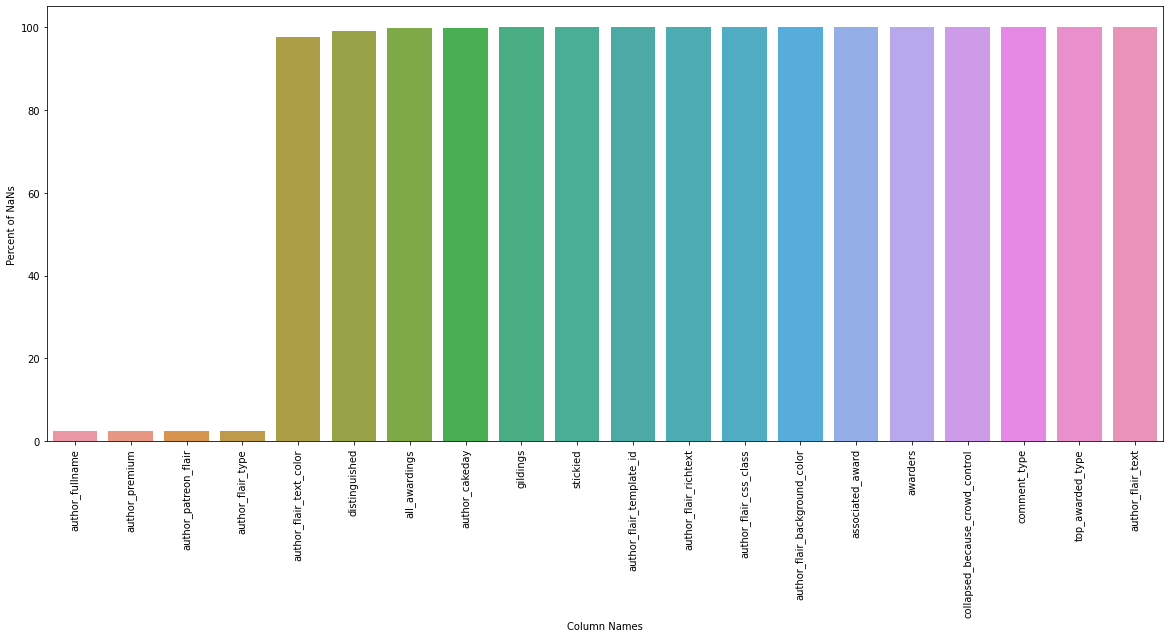

In [18]:
# plot_my_nans(df, save_output='../images/nan_columns_after.png')
plot_my_nans(df)

## Dropping Columns
### I decided to drop the following columns
These columns either tell me to much or too little.

#### Too little
What I mean by telling me *too little* I expressed earlier in htis document (e.g. turning empty square brackets into NaNs).

#### Too much
What I mean by telling me *too much*, I give the example that the permalink has the subreeddit name within it. 

Another example of too much is the fact that people on reddit tend to "hang out" in the same subreddit, as I mentioned earlier in this document. 
In the end, I got rid of __*most*__ author information.

Leaving things like this in place would defeat the purpose of this project.

In [19]:
drop_cols = [ 'all_awardings', 'associated_award', 'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id', 'author_flair_text', 'author_flair_text_color', 
       'author_flair_type', 'author_patreon_flair', 'awarders', 'collapsed_because_crowd_control', 'comment_type',
       'created_utc', 'gildings',
       'locked', 'permalink', 'retrieved_on', 'stickied', 'subreddit_id', 'top_awarded_type', 'treatment_tags', 
       'distinguished', 'author_cakeday']

df.drop(columns=drop_cols, inplace=True)

In [20]:
df = remove_deleted_comments(df)

In [21]:
df.dropna(inplace=True)

In [22]:
# CLeaned out irrelevent data
df.isna().sum()

author                   0
author_fullname          0
author_premium           0
body                     0
id                       0
is_submitter             0
link_id                  0
no_follow                0
parent_id                0
score                    0
send_replies             0
subreddit                0
total_awards_received    0
post_length              0
dtype: int64

In [23]:
df

,author,author_fullname,author_premium,body,id,is_submitter,link_id,no_follow,parent_id,score,send_replies,subreddit,total_awards_received,post_length
0,AgronLovesSteel,t2_68gsl4ib,False,Omg sooo good just finished! Gotta have some f...,gvrcgqn,True,t3_mxukth,True,t1_gvrccgy,1,True,AMA,0,68
1,Adventurous-Mess9304,t2_8x6i6s4f,False,Great answer,gvrcf1t,False,t3_mxnfsk,True,t1_gvqnjl0,2,True,AMA,0,12
2,ab901,t2_6cyel9fk,False,thank you for serving and protecting!,gvrcd04,False,t3_mxnfsk,True,t3_mxnfsk,1,True,AMA,0,37
4,pardo92,t2_uckdfgu,False,Im sure they brighten the place up :) hows the...,gvrccgy,False,t3_mxukth,True,t1_gvrc8ir,1,True,AMA,0,53
5,strawberrycreampie,t2_7vozh,False,"yes, i would have needed the gun. im much too ...",gvrcaz0,True,t3_mxi3xq,True,t1_gvoquax,1,True,AMA,0,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chief_BRUH,t2_rz6p1,False,Bruh,gvrcwi6,False,t3_mxf4dl,True,t1_gvor24q,1,True,AskReddit,0,4
9996,thelemonx,t2_kj5x6,False,Pretty much all herbivores are. People think ...,gvrcwhi,False,t3_mxqjly,False,t1_gvqzlil,50,True,AskReddit,0,101
9997,dieinafirenazi,t2_3y2z14a7,False,A rat in an enriching environment (other rats ...,gvrcwgr,False,t3_mxnf10,False,t1_gvr51zw,37,True,AskReddit,0,144
9998,theFLORIDAman04,t2_5dmamdcl,False,"""You are the worst child I have had"" or the cl...",gvrcwgl,False,t3_mxf4dl,True,t3_mxf4dl,1,True,AskReddit,0,385


In [24]:
df['is_submitter'].value_counts()

False    7713
True     2050
Name: is_submitter, dtype: int64

In [25]:
df['author_premium'].value_counts()

False    8984
True      779
Name: author_premium, dtype: int64

In [26]:
df['no_follow'].value_counts()

True     7570
False    2193
Name: no_follow, dtype: int64

In [27]:
df['total_awards_received'].value_counts()

0    9734
1      26
8       1
2       1
3       1
Name: total_awards_received, dtype: int64

In [28]:
df[df['total_awards_received'] > 0][['subreddit', 'total_awards_received']]

,subreddit,total_awards_received
1063,AMA,2
2739,AMA,1
5047,AskReddit,1
5284,AskReddit,1
5618,AskReddit,1
5627,AskReddit,1
5837,AskReddit,1
5963,AskReddit,1
6204,AskReddit,1
6221,AskReddit,1


In [29]:
df['send_replies'].value_counts()

True     9663
False     100
Name: send_replies, dtype: int64

In [30]:
# Remove Sticky posts, and then remove the column
# Sticky posts are announcements and are not posts.
#df[df['stickied'] == True][['subreddit', 'body']]

In [31]:
df

,author,author_fullname,author_premium,body,id,is_submitter,link_id,no_follow,parent_id,score,send_replies,subreddit,total_awards_received,post_length
0,AgronLovesSteel,t2_68gsl4ib,False,Omg sooo good just finished! Gotta have some f...,gvrcgqn,True,t3_mxukth,True,t1_gvrccgy,1,True,AMA,0,68
1,Adventurous-Mess9304,t2_8x6i6s4f,False,Great answer,gvrcf1t,False,t3_mxnfsk,True,t1_gvqnjl0,2,True,AMA,0,12
2,ab901,t2_6cyel9fk,False,thank you for serving and protecting!,gvrcd04,False,t3_mxnfsk,True,t3_mxnfsk,1,True,AMA,0,37
4,pardo92,t2_uckdfgu,False,Im sure they brighten the place up :) hows the...,gvrccgy,False,t3_mxukth,True,t1_gvrc8ir,1,True,AMA,0,53
5,strawberrycreampie,t2_7vozh,False,"yes, i would have needed the gun. im much too ...",gvrcaz0,True,t3_mxi3xq,True,t1_gvoquax,1,True,AMA,0,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Chief_BRUH,t2_rz6p1,False,Bruh,gvrcwi6,False,t3_mxf4dl,True,t1_gvor24q,1,True,AskReddit,0,4
9996,thelemonx,t2_kj5x6,False,Pretty much all herbivores are. People think ...,gvrcwhi,False,t3_mxqjly,False,t1_gvqzlil,50,True,AskReddit,0,101
9997,dieinafirenazi,t2_3y2z14a7,False,A rat in an enriching environment (other rats ...,gvrcwgr,False,t3_mxnf10,False,t1_gvr51zw,37,True,AskReddit,0,144
9998,theFLORIDAman04,t2_5dmamdcl,False,"""You are the worst child I have had"" or the cl...",gvrcwgl,False,t3_mxf4dl,True,t3_mxf4dl,1,True,AskReddit,0,385


### Checking for more NaNs
Looking good!

In [32]:
df.isna().sum()

author                   0
author_fullname          0
author_premium           0
body                     0
id                       0
is_submitter             0
link_id                  0
no_follow                0
parent_id                0
score                    0
send_replies             0
subreddit                0
total_awards_received    0
post_length              0
dtype: int64

In [33]:
df.shape

(9763, 14)

## Adding a Feature
#### Adding `post_length`
Post length contains the number of characters in a posted comment.

In [34]:
df['post_length'].describe()

count    9763.000000
mean      155.274199
std       301.224344
min         1.000000
25%        31.000000
50%        74.000000
75%       167.000000
max      8845.000000
Name: post_length, dtype: float64

#### Some potential outliers

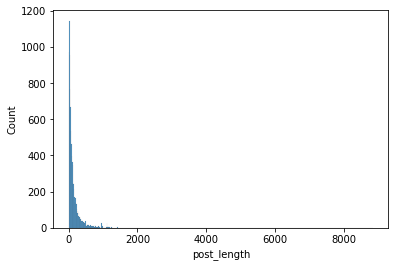

In [35]:
sns.histplot(data=df, x='post_length');
# plt.savefig('../images/post_length_histo.png', bbox_inches = "tight")

In [36]:
# How many posts greater than 6000
df[df['post_length'] >= 6000]['subreddit'].value_counts()

AMA    4
Name: subreddit, dtype: int64

In [37]:
# How many posts greater than 4000
df[df['post_length'] >= 4000]['subreddit'].value_counts()

AMA          8
AskReddit    3
Name: subreddit, dtype: int64

In [38]:
# How many posts greater than 2000
df[df['post_length'] >= 2000]['subreddit'].value_counts()

AMA          21
AskReddit    11
Name: subreddit, dtype: int64

In [39]:
# How many posts greater than 1000
df[df['post_length'] >= 1000]['subreddit'].value_counts()

AMA          76
AskReddit    73
Name: subreddit, dtype: int64

In [40]:
# How many posts greater than 500
df[df['post_length'] >= 500]['subreddit'].value_counts()

AMA          301
AskReddit    265
Name: subreddit, dtype: int64

In [41]:
# We can get rid of 32 rows by counting any comment over 2000 char as an outlier
#    (which is not much considering the original data set is 10_000, making this amount less than 0.33%)
# This has the added benefit of making this task more difficult since more of the longer posts seemed to be from AMA

# df = df[df['post_length'] < 2000]
df = df[df['post_length'] < 4000]
print('Rows remaining: ')
df.shape[0]

Rows remaining: 


9752

In [42]:
# percent of removed data, out of 10_000
100*(start_rows - df.shape[0])/start_rows

2.48

In [43]:
# percent of adequate data, out of 10_000
100*df.shape[0]/start_rows

97.52

## EXPORT!

In [44]:
# Uncomment to export.
# df.to_csv('../data/clean_data.csv')

#### Wrapping up the EDA process...
Literally, wrapping it up - I wrote a function that deals with this since it is all things that can be automated.
I then converted it into a class which cconverts the input DataFrame into a clean one.

I found that using either the function or Class was desirable so I can get more data, or new data and run models on the fly.


Also, in regard to "outliers" in character-length, I found that removing outliers with character-length greater than 2000 was too much; I settled on greater than 4000 instead.
